In [1]:
import pandas as pd
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
df['Address'].nunique()

5000

In [4]:
df.drop('Address',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [6]:
x=df.drop('Price',axis=1)
y=df['Price']

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [8]:
from sklearn.linear_model import LinearRegression
mdl=LinearRegression()

In [9]:
mdl.fit(xtrain,ytrain)

LinearRegression()

In [10]:
Pred=mdl.predict(xtest)

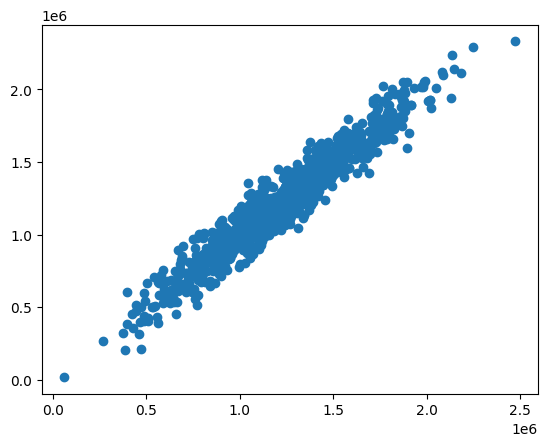

In [11]:
import matplotlib.pyplot as plt
plt.scatter(Pred,ytest)

In [12]:
mdl.score(xtest,ytest)

0.9257181644796197

In [13]:
import pickle
with open('xyz','wb')as file:
  pickle.dump(mdl,file)

In [14]:
import pickle
with open('xyz','rb')as file:
  pred=pickle.load(file)

In [15]:
a=float(input('Please enter your income'))
b=float(input('Please enter House age'))
c=float(input('Please enter Number of rooms'))
d=float(input('Please enter Number of bedroom'))
e=float(input('Please enter Area Population'))
rst=pred.predict([[a,b,c,d,e]])
print('Estimated price of house is',rst[0])

Please enter your income60000
Please enter House age3
Please enter Number of rooms2
Please enter Number of bedroom2
Please enter Area Population56789
Estimated price of house is 261956.0750594372


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
